In [1]:
#Step 1. Import and Install Dependencies

In [1]:
!pip install --upgrade pip
!pip install tensorflow==2.15.0 mediapipe==0.10.14 opencv-python scikit-learn matplotlib

   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 8.9/8.9 MB 61.2 MB/s  0:00:00

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn

In [2]:
!C:\Users\rojod\py310_env\Scripts\python.exe -m pip install --upgrade pip

The system cannot find the path specified.


In [3]:
!pip install tensorflow==2.15.0 mediapipe==0.10.14 opencv-python scikit-learn matplotlib


In [5]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [6]:
# Step 2. Keypoints using MP Holistic

In [7]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities
mp_face = mp.solutions.face_mesh
mp_pose = mp.solutions.pose
mp_hands = mp.solutions.hands

In [8]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR to RGB
    image.flags.writeable = False # IMAGE NO LONGER WRITEABLE
    results = model.process(image) # MAKE PREDICTION
    image.flags.writeable = True # IMAGE IS NOW WRITEABLE
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR CONVERSION RGB to BGR
    return image, results

In [9]:
def draw_landmarks(image, results):
    # Draw face landmarks
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.face_landmarks,
            mp_face.FACEMESH_TESSELATION,  # Updated for new version
            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        )

    # Draw pose landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS
        )

    # Draw left hand landmarks
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.left_hand_landmarks,
            mp_hands.HAND_CONNECTIONS
        )

    # Draw right hand landmarks
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.right_hand_landmarks,
            mp_hands.HAND_CONNECTIONS
        )

In [10]:
def draw_styled_landmarks(image, results):
    # Draw face landmarks
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.face_landmarks,
            mp_face.FACEMESH_TESSELATION,  # Updated for new version
            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        )

    # Draw pose landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        )

    # Draw left hand landmarks
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.left_hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121,44,121), thickness=2, circle_radius=2)
        )

    # Draw right hand landmarks
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.right_hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )

In [11]:
mp_drawing.draw_landmarks??

Signature:
mp_drawing.draw_landmarks(
    image: numpy.ndarray,
    landmark_list: mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[int, mediapipe.python.solutions.drawing_utils.DrawingSpec], NoneType] = DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),
    connection_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[Tuple[int, int], mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(224, 224, 224), thickness=2, circle_radius=2),
    is_drawing_landmarks: bool = True,
)
Source:   
def draw_landmarks(
    image: np.ndarray,
    landmark_list: landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Optional[
        Union[DrawingSpec, Mapping[int, DrawingSpec]]
    ] = DrawingSpec(color=RED_

In [12]:
# Default camera
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read Frame
        ret, frame = cap.read()
        if not ret:
            break
    
        # Make Detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
    
        # Press 'q' to quit / Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

C:\Users\rojod\AppData\Roaming\Python\Python310\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [13]:
frame

array([[[ 65,  80,  96],
        [ 66,  81,  94],
        [ 69,  82,  93],
        ...,
        [ 93, 111, 136],
        [ 94, 111, 138],
        [ 90, 107, 134]],

       [[ 67,  81,  93],
        [ 67,  81,  93],
        [ 69,  81,  92],
        ...,
        [ 99, 117, 142],
        [101, 118, 144],
        [ 99, 116, 143]],

       [[ 70,  84,  90],
        [ 70,  82,  89],
        [ 70,  81,  89],
        ...,
        [100, 118, 142],
        [102, 118, 144],
        [103, 119, 145]],

       ...,

       [[ 88, 129, 148],
        [ 92, 133, 151],
        [ 93, 135, 151],
        ...,
        [ 30,  34,  38],
        [ 31,  35,  40],
        [ 33,  37,  42]],

       [[ 88, 131, 148],
        [ 89, 132, 148],
        [ 90, 134, 148],
        ...,
        [ 31,  35,  41],
        [ 33,  36,  44],
        [ 34,  37,  46]],

       [[ 88, 132, 149],
        [ 88, 132, 148],
        [ 91, 135, 149],
        ...,
        [ 32,  36,  42],
        [ 33,  35,  45],
        [ 35,  37,  48]]

In [14]:
draw_landmarks(frame, results)

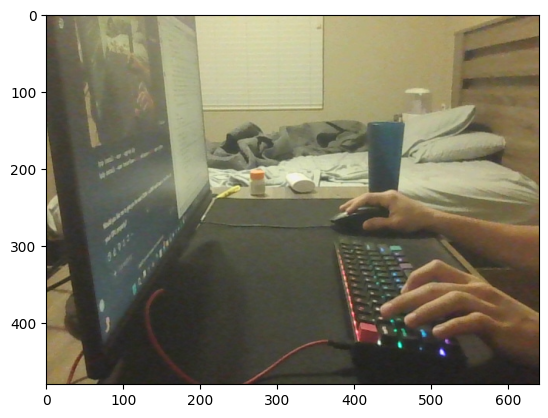

In [15]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [16]:
# Step 3 Extract Keypoint Values

In [17]:
results.pose_landmarks

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [18]:
pose.shape

NameError: name 'pose' is not defined

In [19]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z,] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z,] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z,] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [20]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
np.zeros(21*3).shape

(63,)

In [22]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z,] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z,] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z,] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [23]:
extract_keypoints(results).shape

(1662,)

In [24]:
# Step 4. Setup Folders for Collection

In [25]:
# PATH for exported data, (numpy arrays)
DATA_PATH = os.path.join('MP_Data')
# Actions to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])
# Thirty videos of data
no_sequences = 30
# Thirty frames per video
sequence_length = 30

In [26]:
# hello
## 0 (stored as numpy arrays)
## 1
## 2
## ..29
# thanks
# I love you

In [27]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [28]:
# STEP 5 Collect Keypoint Values for Training and Testing

In [24]:
# Default camera
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # NEW LOOP
    # Loop through actions
    for action in actions:
        #Loop through sequences
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
    
                # Read Frame
                ret, frame = cap.read()
                if not ret:
                    break
            
                # Make Detections
                image, results = mediapipe_detection(frame, holistic)
                print(results)
        
                # Draw landmarks
                draw_styled_landmarks(image, results)
    
                # Apply NEW wait logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                # Show to screen
                cv2.imshow('OpenCV Feed', image)
        
                # Press 'q' to quit / Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [29]:
# Step 6: Preprocess Data and Create Labels and Features

In [30]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [31]:
label_map = {label:num for num, label in enumerate(actions)}

In [32]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [38]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [39]:
np.array(sequences).shape
# 90 videos, 30 frames each, each frame with 1662 keypoints

(90, 30, 1662)

In [40]:
np.array(labels).shape
# 90 for 3 actions with 30 videos each

(90,)

In [41]:
X = np.array(sequences)

In [42]:
X.shape

(90, 30, 1662)

In [43]:
Y = to_categorical(labels).astype(int)

In [44]:
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [79]:
Y_train.shape

(72, 3)

In [80]:
# Step 7: Build and Train LSTM (Long-Short Term Memory) Neural Network

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [82]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [83]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation = 'relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation = 'relu'))
model.add(LSTM(64, return_sequences=False, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [84]:
res = [0.7, 0.2, 0.1]

In [85]:
actions[np.argmax(res)]

'hello'

In [86]:
model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['categorical_accuracy'])

In [87]:
model.fit(X_train, Y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 2s 22ms/step - loss: 1.2489 - categorical_accuracy: 0.3611
Epoch 2/2000
3/3 [==============================] - 0s 20ms/step - loss: 1.1045 - categorical_accuracy: 0.3056
Epoch 3/2000
3/3 [==============================] - 0s 20ms/step - loss: 1.5949 - categorical_accuracy: 0.2778
Epoch 4/2000
3/3 [==============================] - 0s 22ms/step - loss: 1.1659 - categorical_accuracy: 0.2917
Epoch 5/2000
3/3 [==============================] - 0s 21ms/step - loss: 1.1027 - categorical_accuracy: 0.2639
Epoch 6/2000
3/3 [==============================] - 0s 20ms/step - loss: 1.0694 - categorical_accuracy: 0.3750
Epoch 7/2000
3/3 [==============================] - 0s 21ms/step - loss: 1.7910 - categorical_accuracy: 0.3472
Epoch 8/2000
3/3 [==============================] - 0s 19ms/step - loss: 1.1042 - categorical_accuracy: 0.3194
Epoch 9/2000
3/3 [==============================] - 0s 19ms/step - loss: 1.0903 - categorical_accuracy: 0.3056
E

In [88]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_10 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 59667

In [89]:
# STEP 8: Make Sign Language Predictions

In [128]:
res = model.predict(X_test)

1/1 [==============================] - 0s 25ms/step


In [133]:
actions[np.argmax(res[3])]

'hello'

In [135]:
actions[np.argmax(Y_test[3])]

'hello'

In [136]:
# Step 9 Save Model Weights

In [137]:
model.save('action.h5')

C:\Users\rojod\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [138]:
# Step 10 Evaluate Model Using Confusion Matrix and Accuracy

In [139]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [147]:
yhat = model.predict(X_train)

3/3 [==============================] - 0s 10ms/step


In [148]:
ytrue = np.argmax(Y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [149]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[44,  2],
        [ 2, 24]],

       [[49,  0],
        [ 2, 21]],

       [[46,  3],
        [ 1, 22]]], dtype=int64)

In [150]:
accuracy_score(ytrue, yhat)

0.9305555555555556

In [151]:
#Step 11 Test Model in Real Time

In [169]:
from scipy import stats

In [174]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res[0]):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

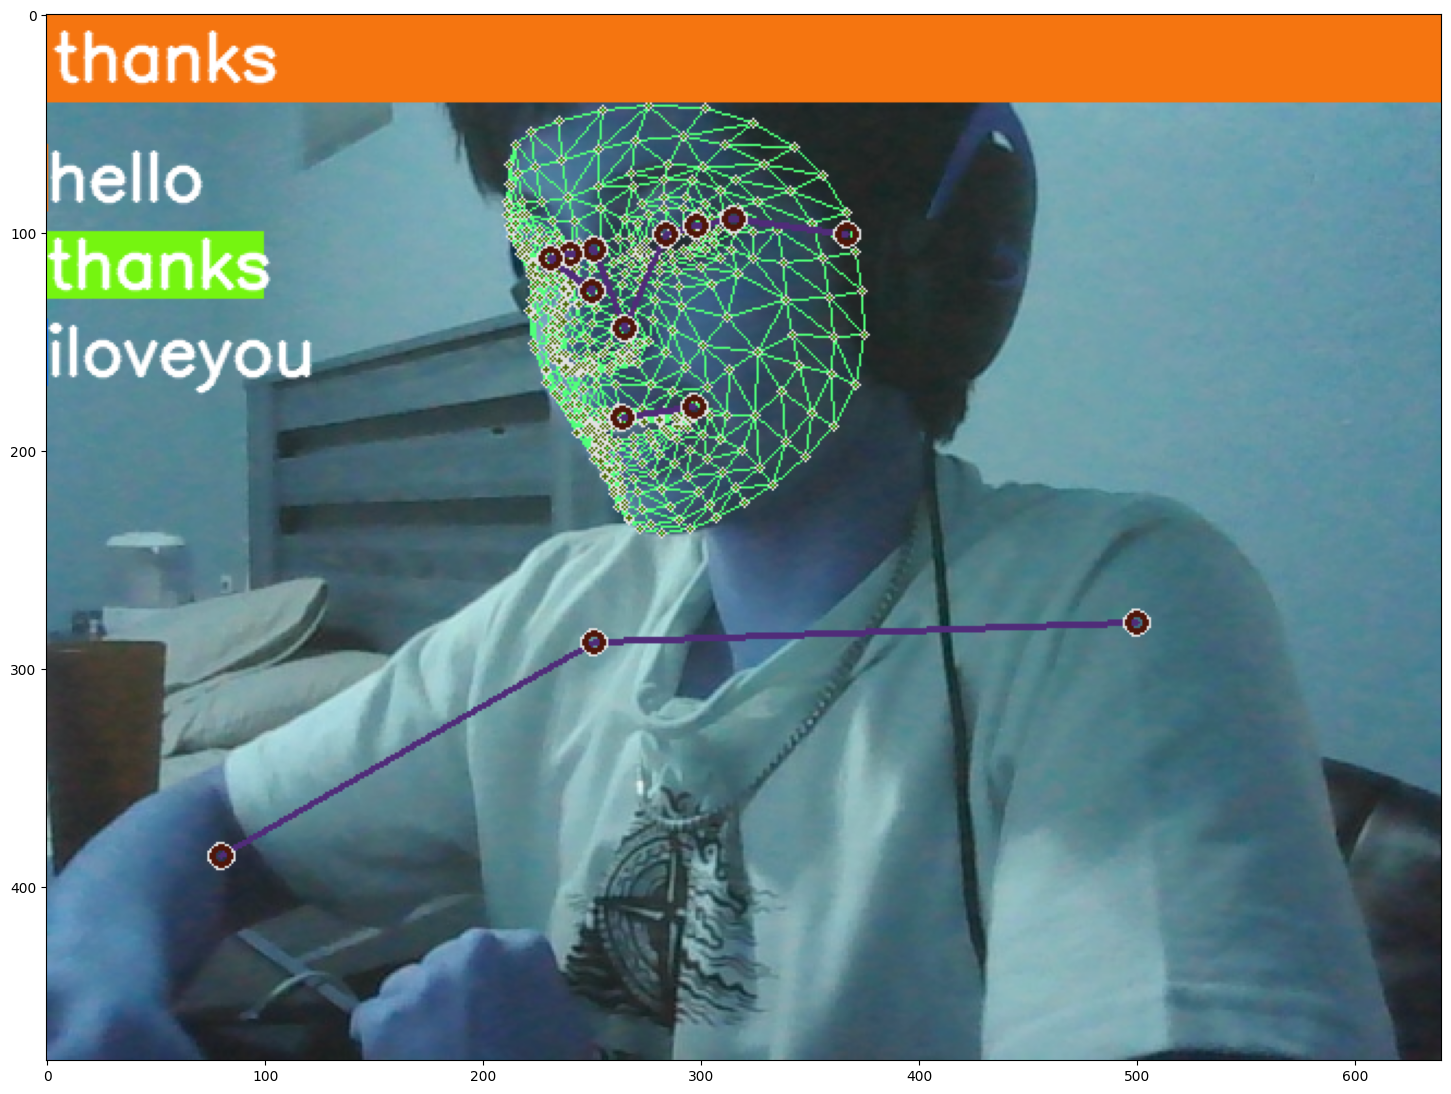

In [175]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [179]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

TypeError: 'numpy.float32' object is not iterable